In [ ]:
# import packages
import numpy as np
from tensorflow.keras.datasets import mnist # type: ignore
from package.models.cnn_mnist import ConvolutionalMnistClassifier
from package.models.feedforward_mnist import FeedForwardMnistClassifier
from package.models.random_forest_mnist import RandomForestMnistClassifier        
from package.main_mnist_classifier import MnistClassifier


In [2]:
#  download mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# initialize models
model_NN = MnistClassifier("nn", x_train, y_train, x_test, y_test) 
model_CNN = MnistClassifier("cnn", x_train, y_train, x_test, y_test)
model_RF = MnistClassifier("rf", x_train, y_train, x_test, y_test)
models = {
    "NN": model_NN,
    "CNN": model_CNN,
    "RF": model_RF
}

C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#  train models
for model_name, model in models.items():
    model.train()

Feed Forward Model trained
CNN Model trained
Random Forest Model trained


Model: NN
Accuracy: 0.9637
Classification Report:
               precision    recall  f1-score   support

           0     0.9836    0.9806    0.9821       980
           1     0.9791    0.9930    0.9860      1135
           2     0.9721    0.9438    0.9577      1032
           3     0.9458    0.9505    0.9481      1010
           4     0.9782    0.9613    0.9697       982
           5     0.9643    0.9383    0.9511       892
           6     0.9729    0.9739    0.9734       958
           7     0.9651    0.9689    0.9670      1028
           8     0.9128    0.9671    0.9392       974
           9     0.9640    0.9544    0.9592      1009

    accuracy                         0.9637     10000
   macro avg     0.9638    0.9632    0.9634     10000
weighted avg     0.9640    0.9637    0.9637     10000



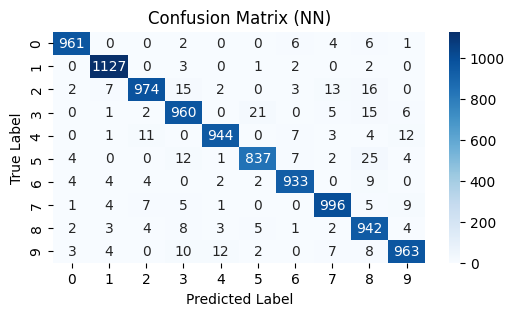

Model: CNN
Accuracy: 0.9876
Classification Report:
               precision    recall  f1-score   support

           0     0.9939    0.9898    0.9918       980
           1     0.9921    0.9947    0.9934      1135
           2     0.9894    0.9913    0.9903      1032
           3     0.9920    0.9871    0.9896      1010
           4     0.9779    0.9898    0.9838       982
           5     0.9821    0.9832    0.9826       892
           6     0.9864    0.9875    0.9870       958
           7     0.9855    0.9922    0.9889      1028
           8     0.9866    0.9856    0.9861       974
           9     0.9889    0.9732    0.9810      1009

    accuracy                         0.9876     10000
   macro avg     0.9875    0.9874    0.9875     10000
weighted avg     0.9876    0.9876    0.9876     10000



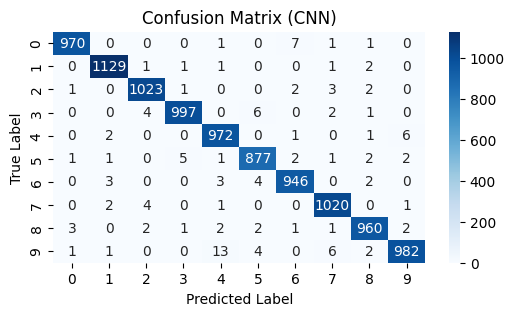

Model: RF
Accuracy: 0.9715
Classification Report:
               precision    recall  f1-score   support

           0     0.9719    0.9898    0.9808       980
           1     0.9903    0.9903    0.9903      1135
           2     0.9615    0.9690    0.9653      1032
           3     0.9672    0.9624    0.9648      1010
           4     0.9765    0.9745    0.9755       982
           5     0.9752    0.9697    0.9725       892
           6     0.9760    0.9770    0.9765       958
           7     0.9707    0.9669    0.9688      1028
           8     0.9619    0.9579    0.9599       974
           9     0.9621    0.9554    0.9587      1009

    accuracy                         0.9715     10000
   macro avg     0.9713    0.9713    0.9713     10000
weighted avg     0.9715    0.9715    0.9715     10000



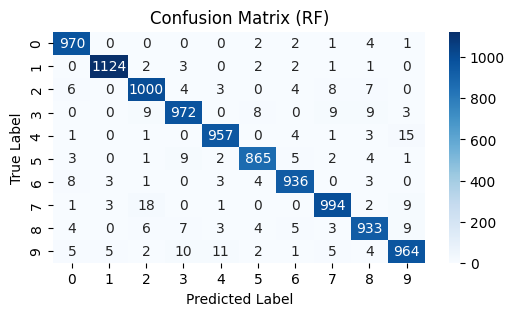

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred,digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()



Misclassified samples (NN)


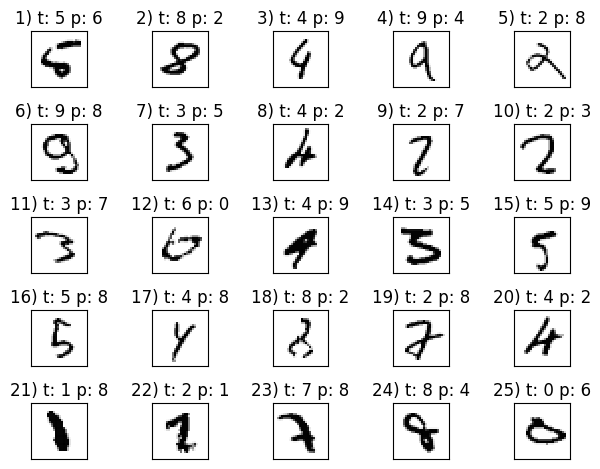

The number of incorrectly classified items in the test set: 363
Misclassified samples (CNN)


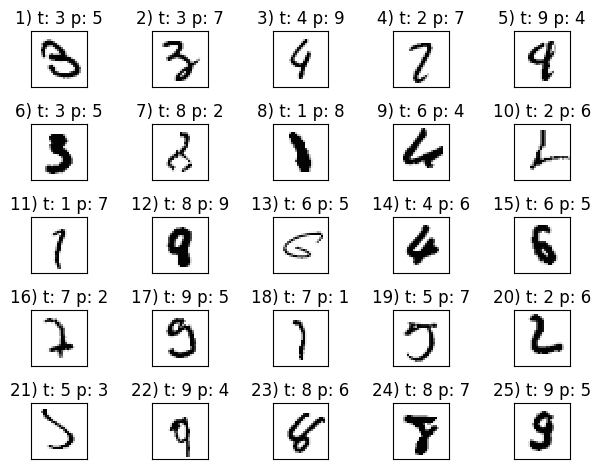

The number of incorrectly classified items in the test set: 124
Misclassified samples (RF)


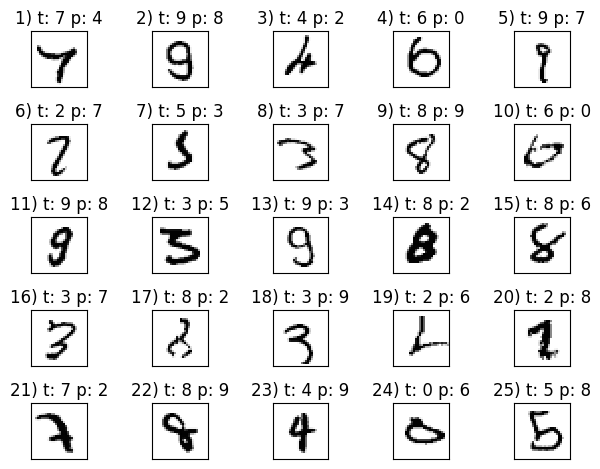

The number of incorrectly classified items in the test set: 285


In [6]:

for model_name, model in models.items():
    y_pred = model.predict(x_test)
    miscl_img = x_test[y_test != y_pred][:25]
    correct_lab = y_test[y_test != y_pred][:25]
    miscl_lab = y_pred[y_test != y_pred][:25]

    fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
    ax = ax.flatten()
    for i in range(25):
        img = miscl_img[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    print(f'Misclassified samples ({model_name})')
    plt.show()
    print(f"The number of incorrectly classified items in the test set: {len(x_test[y_test != y_pred])}")
